# 第４章 特徴量の生成

## 初期処理

### Google Driveのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### ライブラリのロード

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.datasets import load_boston

### ファイルの読込

#### 作業用のフォルダへ移動

In [12]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


#### ファイルの読込

In [0]:
dfTips = sns.load_dataset("tips")
dfTitanic = pd.read_csv("./data/train.csv")
boston = load_boston()

dfBoston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfBoston["MEDV"] = boston.target

dfTips_back = dfTips.copy()
dfTitanic_back = dfTitanic.copy()
dfBoston_back = dfBoston.copy()

## 特徴量生成

### ビニング

In [14]:
dfTips["total_bill_bin"], bins = pd.qcut( dfTips["total_bill"], labels=[1,2,3,4], q=4, retbins=True )
print( dfTips.head(3) )
print("-----")
print( dfTips.describe().loc["count"] )
print("-----")
print( dfTips["total_bill_bin"].value_counts() )
print("-----")
print( bins )


   total_bill   tip     sex smoker  day    time  size total_bill_bin
0       16.99  1.01  Female     No  Sun  Dinner     2              2
1       10.34  1.66    Male     No  Sun  Dinner     3              1
2       21.01  3.50    Male     No  Sun  Dinner     3              3
-----
total_bill    244.0
tip           244.0
size          244.0
Name: count, dtype: float64
-----
4    61
3    61
2    61
1    61
Name: total_bill_bin, dtype: int64
-----
[ 3.07   13.3475 17.795  24.1275 50.81  ]


### 標準化

In [15]:
print( dfTips["total_bill"].head(3) )
print( "-----" )

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfTips["total_bill_scl"] = scaler.fit_transform( dfTips.loc[:,"total_bill"].values.reshape(-1,1).tolist() )
print( dfTips["total_bill_scl"].head(3) )

0    16.99
1    10.34
2    21.01
Name: total_bill, dtype: float64
-----
0   -0.314711
1   -1.063235
2    0.137780
Name: total_bill_scl, dtype: float64


### 正規化

In [16]:
print( dfTips["total_bill"].head(3) )
print( "-----" )

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dfTips["total_bill_mm"] = scaler.fit_transform( dfTips.loc[:,"total_bill"].values.reshape(-1,1).tolist() )
print( dfTips["total_bill_mm"].head(3) )
print( "-----" )
print( dfTips["total_bill_mm"].describe().loc["min"] )
print( dfTips["total_bill_mm"].describe().loc["max"] )

0    16.99
1    10.34
2    21.01
Name: total_bill, dtype: float64
-----
0    0.291579
1    0.152283
2    0.375786
Name: total_bill_mm, dtype: float64
-----
0.0
0.9999999999999999


### 対数変換

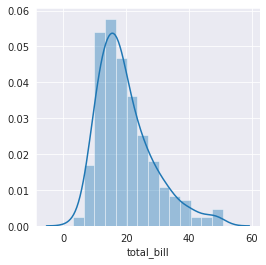

In [17]:
fig = plt.figure( figsize=(4,4) )
ax = fig.subplots(  )
sns.distplot(dfTips["total_bill"], ax=ax)

In [0]:
dfTips["total_bill_log"] = np.log( dfTips["total_bill"] )

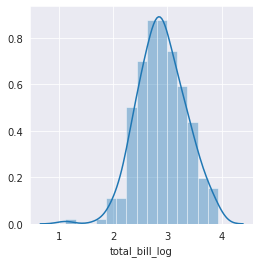

In [19]:
fig = plt.figure( figsize=(4,4) )
ax = fig.subplots(  )
sns.distplot(dfTips["total_bill_log"], ax=ax)

### 交互作用／多項式特徴量

In [20]:
dfTitanic = dfTitanic_back.copy()
dfTitanic = dfTitanic.dropna(how="any")

print( dfTitanic[dfTitanic.Age > 25].Age.mean() )
print( dfTitanic[ dfTitanic.Fare > 100].Fare.mean() )

43.034351145038165
186.35131707317072


In [0]:
dfTitanic["Age_bin"] = pd.cut( dfTitanic["Age"], [0,5,10,15,20,25,100], labels=[2,7,12,17,22,43] , right=False )
dfTitanic["Fare_bin"] = pd.cut( dfTitanic["Fare"], [0,100,600], labels=[50,186] , right=False)


In [0]:
dfTitanic = dfTitanic.drop(columns=["PassengerId","Name","Ticket","Age", "Fare", "Survived", "Cabin"])

In [0]:
dummy = pd.get_dummies(dfTitanic[["Sex"]])
dfTitanic = pd.concat( [dfTitanic.drop(["Sex"], axis=1), dummy], axis=1 )
dummy = pd.get_dummies(dfTitanic[["Embarked"]])
dfTitanic = pd.concat( [dfTitanic.drop(["Embarked"], axis=1), dummy], axis=1 )

In [24]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
output = pf.fit_transform(dfTitanic)
print( output )

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 0.]]


In [25]:
print( pf.get_feature_names(dfTitanic.columns) )

['1', 'Pclass', 'SibSp', 'Parch', 'Age_bin', 'Fare_bin', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass^2', 'Pclass SibSp', 'Pclass Parch', 'Pclass Age_bin', 'Pclass Fare_bin', 'Pclass Sex_female', 'Pclass Sex_male', 'Pclass Embarked_C', 'Pclass Embarked_Q', 'Pclass Embarked_S', 'SibSp^2', 'SibSp Parch', 'SibSp Age_bin', 'SibSp Fare_bin', 'SibSp Sex_female', 'SibSp Sex_male', 'SibSp Embarked_C', 'SibSp Embarked_Q', 'SibSp Embarked_S', 'Parch^2', 'Parch Age_bin', 'Parch Fare_bin', 'Parch Sex_female', 'Parch Sex_male', 'Parch Embarked_C', 'Parch Embarked_Q', 'Parch Embarked_S', 'Age_bin^2', 'Age_bin Fare_bin', 'Age_bin Sex_female', 'Age_bin Sex_male', 'Age_bin Embarked_C', 'Age_bin Embarked_Q', 'Age_bin Embarked_S', 'Fare_bin^2', 'Fare_bin Sex_female', 'Fare_bin Sex_male', 'Fare_bin Embarked_C', 'Fare_bin Embarked_Q', 'Fare_bin Embarked_S', 'Sex_female^2', 'Sex_female Sex_male', 'Sex_female Embarked_C', 'Sex_female Embarked_Q', 'Sex_female Embarked_S', 'Sex_m

### ドメイン知識を用いた特徴量追加

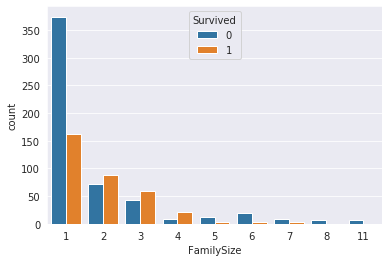

In [27]:
dfTitanic = dfTitanic_back.copy()

dfTitanic["FamilySize"] = dfTitanic["SibSp"] + dfTitanic["Parch"] + 1
sns.countplot(x='FamilySize', data = dfTitanic, hue = "Survived")

In [0]:
dfTitanic["IsAlone"] = 1
dfTitanic.loc[ dfTitanic["FamilySize"] > 1, "IsAlone"] = 0

### PCA

In [0]:
dfTips = dfTips_back.copy()

In [0]:
dummy = pd.get_dummies(dfTips[["sex"]])
dfTips = pd.concat( [dfTips.drop(["sex"], axis=1), dummy], axis=1 )
dummy = pd.get_dummies(dfTips[["smoker"]])
dfTips = pd.concat( [dfTips.drop(["smoker"], axis=1), dummy], axis=1 )
dummy = pd.get_dummies(dfTips[["day"]])
dfTips = pd.concat( [dfTips.drop(["day"], axis=1), dummy], axis=1 )
dummy = pd.get_dummies(dfTips[["time"]])
dfTips = pd.concat( [dfTips.drop(["time"], axis=1), dummy], axis=1 )

In [0]:
dfTips_target = dfTips.loc[:,"tip"]
dfTips_feature = dfTips.drop(columns=["tip"])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in dfTips.columns:
  dfTips[ column + "_scl"] = scaler.fit_transform( dfTips.loc[:,column].values.reshape(-1,1).tolist() )
  dfTips = dfTips.drop( columns = [ column ] )

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(dfTips_feature)

In [34]:
print('各次元それぞれの寄与率: {0}'.format(pca.explained_variance_ratio_))

各次元それぞれの寄与率: [0.96849762 0.00855589]


Text(0, 0.5, 'PC2')

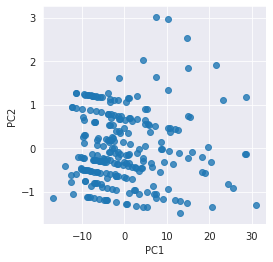

In [35]:
fig = plt.figure(figsize=(4, 4))
plt.scatter(transformed[:, 0], transformed[:, 1], alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")

### featuretools

In [0]:
dfTitanic = dfTitanic_back.copy()
dfTitanic = dfTitanic.drop(columns=["PassengerId","Name","Ticket"])
dfTitanic_feature = dfTitanic.drop("Survived", axis=1) # 目的変数の除外、特徴量の取出し
dfTitanic_target = dfTitanic.loc[:, "Survived"] # 目的変数の取出

In [37]:
pip install featuretools

In [0]:
import featuretools as ft
import featuretools.variable_types as vtypes

In [39]:
variable_types = { "Sex": vtypes.Categorical,
      "Pclass": vtypes.Categorical,
      "Embarked": vtypes.Categorical}
es = ft.EntitySet(id = "Survivors")
es.entity_from_dataframe(entity_id = "Passengers", dataframe = dfTitanic_feature, index = "Id", variable_types=variable_types)

2020-01-07 12:32:35,284 featuretools.entityset - WARNING    index Id not found in dataframe, creating new integer column


Entityset: Survivors
  Entities:
    Passengers [Rows: 891, Columns: 9]
  Relationships:
    No relationships

In [0]:
es = es.normalize_entity(base_entity_id="Passengers", new_entity_id="Pclass", index="Pclass")
es = es.normalize_entity(base_entity_id="Passengers", new_entity_id="Sex", index="Sex")
es = es.normalize_entity(base_entity_id="Passengers", new_entity_id="Embarked", index="Embarked")

In [41]:
fmatrix, fnames = ft.dfs(entityset=es, 
    target_entity = "Passengers", 
    max_depth = 2, 
    verbose = 3, 
    n_jobs = 1)

Built 101 features
Elapsed: 00:04 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [42]:
print( fmatrix.head(3) )

     Age  ...  Embarked.MODE(Passengers.Pclass)
Id        ...                                  
0   22.0  ...                               3.0
1   38.0  ...                               1.0
2   26.0  ...                               3.0

[3 rows x 101 columns]


In [43]:
print( fnames )

[<Feature: Age>, <Feature: SibSp>, <Feature: Parch>, <Feature: Fare>, <Feature: Cabin>, <Feature: Sex>, <Feature: Pclass>, <Feature: Embarked>, <Feature: Pclass.SUM(Passengers.Age)>, <Feature: Pclass.SUM(Passengers.SibSp)>, <Feature: Pclass.SUM(Passengers.Parch)>, <Feature: Pclass.SUM(Passengers.Fare)>, <Feature: Pclass.STD(Passengers.Age)>, <Feature: Pclass.STD(Passengers.SibSp)>, <Feature: Pclass.STD(Passengers.Parch)>, <Feature: Pclass.STD(Passengers.Fare)>, <Feature: Pclass.MAX(Passengers.Age)>, <Feature: Pclass.MAX(Passengers.SibSp)>, <Feature: Pclass.MAX(Passengers.Parch)>, <Feature: Pclass.MAX(Passengers.Fare)>, <Feature: Pclass.SKEW(Passengers.Age)>, <Feature: Pclass.SKEW(Passengers.SibSp)>, <Feature: Pclass.SKEW(Passengers.Parch)>, <Feature: Pclass.SKEW(Passengers.Fare)>, <Feature: Pclass.MIN(Passengers.Age)>, <Feature: Pclass.MIN(Passengers.SibSp)>, <Feature: Pclass.MIN(Passengers.Parch)>, <Feature: Pclass.MIN(Passengers.Fare)>, <Feature: Pclass.MEAN(Passengers.Age)>, <Featur

In [44]:
print( fmatrix.loc[:, ["Sex", "Pclass", "Embarked", "Sex.MEAN(Passengers.Age)", "Pclass.MEAN(Passengers.Age)", "Embarked.MEAN(Passengers.Age)"]] )

        Sex  Pclass  ... Pclass.MEAN(Passengers.Age)  Embarked.MEAN(Passengers.Age)
Id                   ...                                                           
0      male       3  ...                   25.140620                      29.445397
1    female       1  ...                   38.233441                      30.814769
2    female       3  ...                   25.140620                      29.445397
3    female       1  ...                   38.233441                      29.445397
4      male       3  ...                   25.140620                      29.445397
..      ...     ...  ...                         ...                            ...
886    male       2  ...                   29.877630                      29.445397
887  female       1  ...                   38.233441                      29.445397
888  female       3  ...                   25.140620                      29.445397
889    male       1  ...                   38.233441                      30

### 回帰分析における各前処理手法の効果

#### 必要なライブラリのロード、前処理

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

In [0]:
dfTips = dfTips_back.copy()

feature = dfTips.loc[:,"total_bill"].values.reshape(-1, 1)
target = dfTips.loc[:,"tip"]

min = dfTips.loc[:,"total_bill"].describe().loc["min"]
max = dfTips.loc[:,"total_bill"].describe().loc["max"]

line = np.linspace(min, max, 1000, endpoint=False).reshape(-1,1)
reg = LinearRegression().fit(feature, target)

#### 単回帰分析

Text(0.5, 0, 'total_bill')

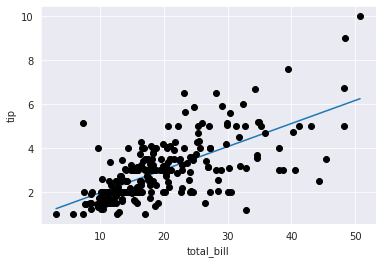

In [47]:
plt.plot(line, reg.predict(line), label="l-reg")
plt.plot(feature, target, 'o', c='k')
plt.ylabel("tip")
plt.xlabel("total_bill")

#### ビニング

In [0]:
# 閾値の設定
bins = np.linspace(min-0.001, max+0.001, 10)

In [0]:
# ビニング（閾値を設定）
feature_binned = pd.cut( dfTips.loc[:,"total_bill"].values, bins = bins, labels = [1,2,3,4,5,6,7,8,9] )
feature_binned = np.array( feature_binned )

In [0]:
line_binned = pd.cut( np.linspace(min, max, 1000, endpoint=False), bins = bins, labels = [1,2,3,4,5,6,7,8,9] )
line_binned = np.array( line_binned )

In [51]:
# One Hot Encoding
oh_encoder = OneHotEncoder(sparse=False)
oh_encoder.fit(feature_binned.reshape(-1,1))
feature_binned_oh = oh_encoder.transform(feature_binned.reshape(-1,1))
line_binned_oh = oh_encoder.transform(line_binned.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'total_bill')

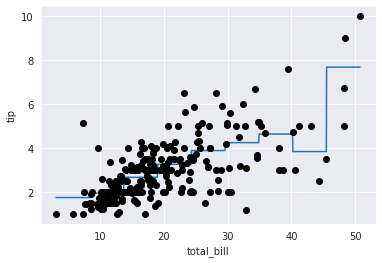

In [52]:
reg = LinearRegression().fit(feature_binned_oh, target)
predict = reg.predict(line_binned_oh)

plt.plot(line, predict, label="l-reg binned")
plt.plot(feature, target, 'o', c='k')

plt.ylabel("tip")
plt.xlabel("total_bill")

### 交互作用特徴量

In [0]:
pf = PolynomialFeatures(degree=10, include_bias=False)
pf.fit(feature)
feature_poly = pf.transform(feature)
line_poly = pf.transform(line)

Text(0.5, 0, 'total_bill')

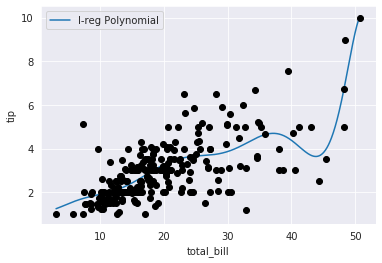

In [54]:
reg = LinearRegression().fit(feature_poly, target)
predict = reg.predict(line_poly)
plt.plot(line, predict, label="l-reg Polynomial")

plt.legend(loc="best")
plt.plot(feature, target, 'o', c='k')

plt.ylabel("tip")
plt.xlabel("total_bill")

In [55]:
print( pf.get_feature_names() )

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']
